In [40]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats
# go to your profile
# Go to accounts
# click on create new api token - a jason file will be download
# Upload that file in google-colab
# run two command prefetch jason file
# download datasets command

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:54<00:00, 15.7MB/s]
100% 1.06G/1.06G [00:54<00:00, 21.0MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [60]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [61]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [62]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [35]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_10 (Bat  (None, 254, 254, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_11 (Bat  (None, 125, 125, 64)     256       
 chNormalization)                                                
                                                      

In [37]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [56]:
import time
start = time.time()
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)
end = time.time() - start

Epoch 1/10
625/625 [==============================] - 69s 110ms/step - loss: 0.0740 - accuracy: 0.9743 - val_loss: 0.6764 - val_accuracy: 0.8200
Epoch 2/10
625/625 [==============================] - 66s 106ms/step - loss: 0.0618 - accuracy: 0.9790 - val_loss: 0.6259 - val_accuracy: 0.8352
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.0556 - accuracy: 0.9807 - val_loss: 0.7082 - val_accuracy: 0.7904
Epoch 4/10
625/625 [==============================] - 66s 106ms/step - loss: 0.0453 - accuracy: 0.9843 - val_loss: 0.8612 - val_accuracy: 0.8028
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.0485 - accuracy: 0.9829 - val_loss: 0.7540 - val_accuracy: 0.7950
Epoch 6/10
625/625 [==============================] - 68s 109ms/step - loss: 0.0453 - accuracy: 0.9847 - val_loss: 0.8427 - val_accuracy: 0.8360
Epoch 7/10
625/625 [==============================] - 68s 109ms/step - loss: 0.0369 - accuracy: 0.9870 - val_loss: 1.1755 - val_ac

In [59]:
print(end)

733.2943253517151


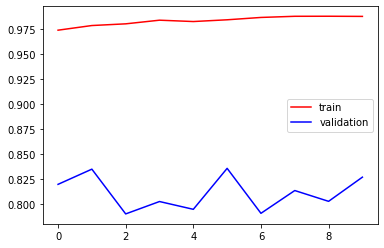

In [58]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

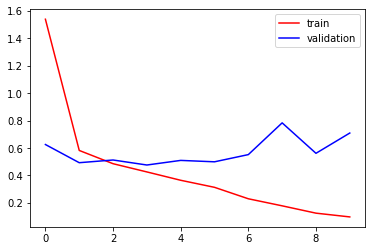

In [42]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [43]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [44]:
import cv2

In [45]:
test_img = cv2.imread('/content/test/cats/cat.10333.jpg')

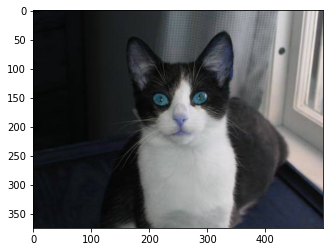

In [46]:
plt.imshow(test_img)

In [47]:
test_img.shape

(375, 499, 3)

In [48]:
test_img = cv2.resize(test_img,(256,256))

In [49]:
test_input = test_img.reshape((1,256,256,3))

In [50]:
model.predict(test_input)

1/1 [==============================] - 0s 205ms/step


array([[6.653442e-37]], dtype=float32)

In [51]:
test_img = cv2.imread('/content/test/dogs/dog.100.jpg')

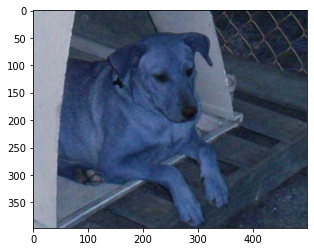

In [52]:
plt.imshow(test_img)

In [53]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))

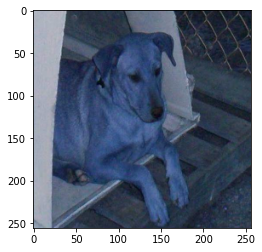

In [54]:
plt.imshow(test_img)

In [55]:
model.predict(test_input)

1/1 [==============================] - 0s 23ms/step


array([[0.]], dtype=float32)